In [12]:
import numpy as np

class HopfieldNetwork:

  def __init__(self, num_neurons):
    self.num_neurons = num_neurons
    self.states = np.random.choice([-1,1], size=num_neurons)
    self.biases = np.random.uniform(-1,1,size=num_neurons)
    self.weights = np.random.uniform(-1,1,size=(num_neurons,num_neurons))
    self.weights = 0.5 *(self.weights + self.weights.T) 
    np.fill_diagonal(self.weights, 0)

  def update_state(self):
    neuron_index = np.random.randint(0, self.num_neurons)
    activation = np.dot(self.weights[neuron_index], self.states) - self.biases[neuron_index]
    self.states[neuron_index] = np.sign(activation)

  def compute_energy(self):
      W_s = np.dot(self.weights, self.states)
      energy = np.dot(self.states,W_s)
      return -0.5 * energy - np.dot(self.biases , self.states)
  
  def has_converged(self, threshold=1e-5):
        new_states = np.copy(self.states)
        for i in range(self.num_neurons):
            activation = np.dot(self.weights[i], self.states) - self.biases[i]
            new_states[i] = np.sign(activation)
        return np.allclose(self.states, new_states, atol=threshold)

  def set_state(self, new_states):
      if len(new_states) == self.num_neurons:
          self.states = np.array(new_states)
      else:
          print("Error: State size mismatch!")

  def get_state(self):
      return self.states

if __name__ == "__main__":
  seed = 10 
  np.random.seed(seed)
  num_neurons = 10
  hopfield_net = HopfieldNetwork(num_neurons)
  print("Initial State:", hopfield_net.get_state())
  while not hopfield_net.has_converged(threshold=1e-2):
      hopfield_net.update_state()

  print("Converged State:", hopfield_net.get_state())
  print("Energy:", hopfield_net.compute_energy())

Initial State: [ 1  1 -1  1 -1  1  1 -1  1  1]
Converged State: [ 1  1 -1  1  1 -1 -1  1 -1 -1]
Energy: 1.4808249470244332


*energy goes down during run*

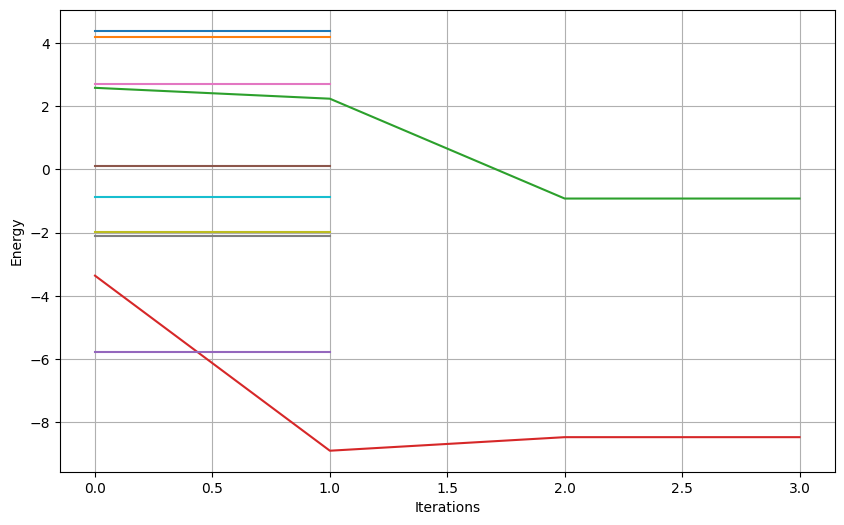

In [14]:
import matplotlib.pyplot as plt
num_neurons = 10
energies = []

for _ in range(num_neurons):
    hopfield_net = HopfieldNetwork(num_neurons)
    energy_values = []

    while True:
        hopfield_net.update_state()
        energy = hopfield_net.compute_energy()
        energy_values.append(energy)

        if len(energy_values) > 1 and energy_values[-1] == energy_values[-2]:
            break

    energies.append(energy_values)


plt.figure(figsize=(10, 6))
for energy_values in energies:
    plt.plot(range(len(energy_values)), energy_values)

plt.xlabel('Iterations')
plt.ylabel('Energy')
plt.grid(True)
plt.show()